# EDA

## RGB/BGR distribution

In [0]:
import cv2
import os
import glob
img_dir = "/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images" # train image directory 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [0]:
### NEED TO RUN SEPARATELY OR ELSE I'D RUN OUT OF SPACE:

In [0]:
B_list = []
G_list = []
R_list = []
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      B_list.append(i[j][k][0])
      # G_list.append(i[j][k][1])
      # R_list.append(i[j][k][2])

In [0]:
sum(B_list)/len(B_list)

85.14902527293562

In [0]:
import numpy as np
B_list = np.array(B_list) # save space because RAM usage is shooting up

In [0]:
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      # B_list.append(i[j][k][0])
      G_list.append(i[j][k][1])
      # R_list.append(i[j][k][2])

In [0]:
G_list = np.array(G_list)

In [0]:
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      # B_list.append(i[j][k][0])
      # G_list.append(i[j][k][1])
      R_list.append(i[j][k][2])

In [0]:
R_list = np.array(R_list)

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Intensity Value')

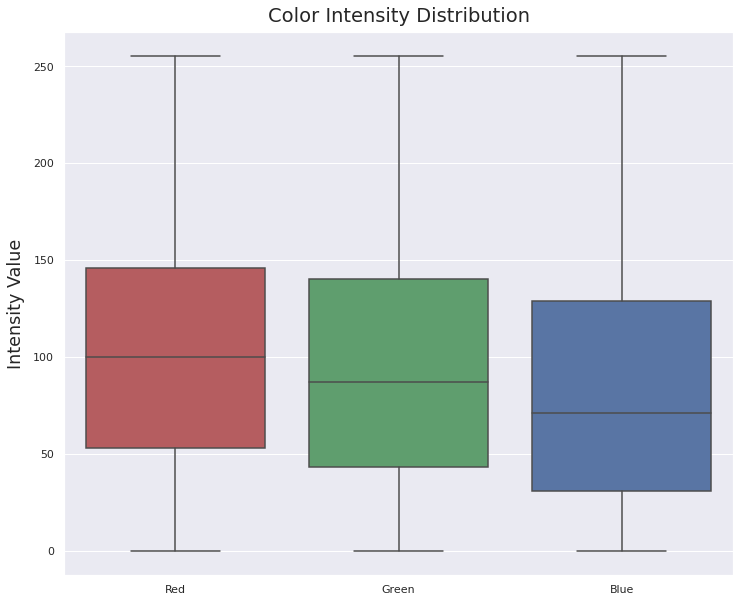

In [0]:
sns.set(rc = {'figure.figsize':(12,10)})

boxplot = sns.boxplot(x=['Red', 'Green', 'Blue'], y=[R_list, G_list, B_list], palette = ['r', 'g', 'b']) #showfliers = False)

# boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
boxplot.axes.set_title('Color Intensity Distribution', fontsize = 19.5, pad = 10) # title info
# boxplot.set_xlabel('Genres', fontsize = 18, labelpad = 10) # xlabel info
boxplot.set_ylabel('Intensity Value', fontsize = 17.5, labelpad = 8) # ylabel info




## Image size distribution (width, height)

In [0]:
import cv2
import os
import glob
img_dir = "/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images" # train image directory 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [0]:
wh_list = []
for i in data:
  wh_list.append((i.shape[0], i.shape[1])) # data[0] is one image: width, height, channels

In [0]:
wh_list[:4]

[(240, 300), (293, 220), (1500, 1500), (2700, 1800)]

In [0]:
import collections
size_count = collections.defaultdict(int)

In [0]:
for i in wh_list:
  size_count[i] += 1

In [0]:
size_count

In [0]:
size_count = dict(size_count)
size_count

In [0]:
counts_list = list(size_count.items())
counts_list

In [0]:
widths = [i[0][0] for i in counts_list]
heights = [i[0][1] for i in counts_list]
counts = [i[1] for i in counts_list]

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Height')

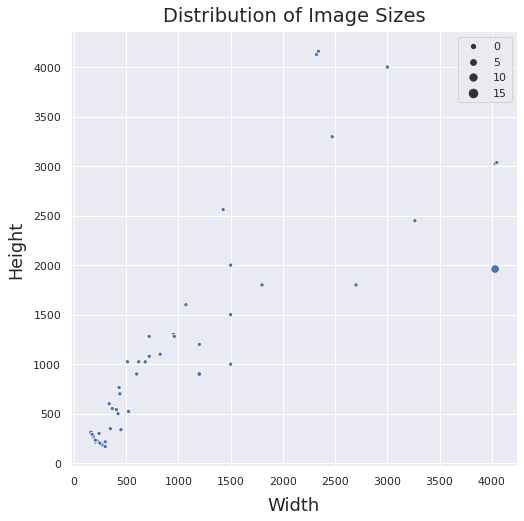

In [0]:
sns.set(rc = {'figure.figsize':(8,8)})

scatter_wh = sns.scatterplot(x = widths, y = heights, size = counts, palette = 'b', )

# scatter_wh.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
scatter_wh.axes.set_title('Distribution of Image Sizes', fontsize = 19.5, pad = 10) # title info
scatter_wh.set_xlabel('Width', fontsize = 18, labelpad = 10) # xlabel info
scatter_wh.set_ylabel('Height', fontsize = 17.5, labelpad = 8) # ylabel info

## Contrast / Image Histogram

In [0]:
import cv2 
from matplotlib import pyplot as plt 

img = cv2.imread('/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images/tp35.jpg', 
                 cv2.IMREAD_GRAYSCALE)


Text(0, 0.5, 'Frequency')

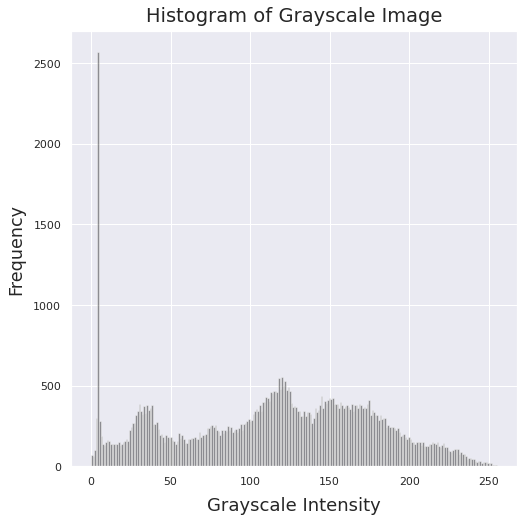

In [0]:
sns.set(rc = {'figure.figsize':(8,8)})

img_hist = sns.distplot(a = img.ravel(), bins = 256, kde = False, norm_hist = False, color = 'black')

# scatter_wh.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
img_hist.axes.set_title('Histogram of Grayscale Image', fontsize = 19.5, pad = 10) # title info
img_hist.set_xlabel('Grayscale Intensity', fontsize = 18, labelpad = 10) # xlabel info
img_hist.set_ylabel('Frequency', fontsize = 17.5, labelpad = 8) # ylabel info

## Splitting Up Luminance Chrominance Color Space (YCrCb Color Space)
Brief overview of color spaces and its code in opencv: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/

In [0]:
import numpy as np

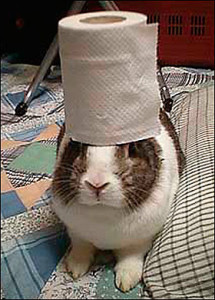

In [0]:
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow is disabled in google colab
img = cv2.imread('/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images/tp35.jpg', 
                 cv2.IMREAD_COLOR)
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [0]:
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

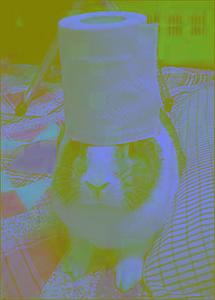

In [0]:
cv2_imshow(img_ycrcb)

In [0]:
img_ycrcb.shape

(300, 215, 3)

In [0]:
luma = img_ycrcb[:,:,0]
chroma_r = img_ycrcb[:,:,1]
chroma_b = img_ycrcb[:,:,2]

In [0]:
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow is disabled in google colab
img = cv2.imread('/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images/tp35.jpg', 
                 cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

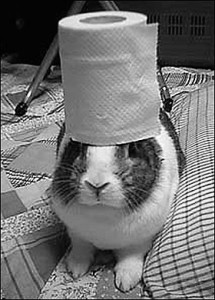

In [0]:
cv2_imshow(luma)

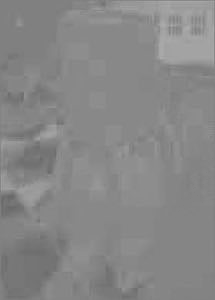

In [0]:
cv2_imshow(chroma_r)

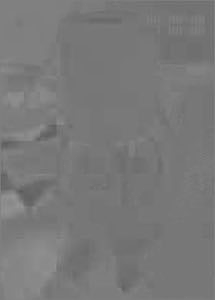

In [0]:
cv2_imshow(chroma_b)

### Splitting up (s)BGR space

In [0]:
blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]

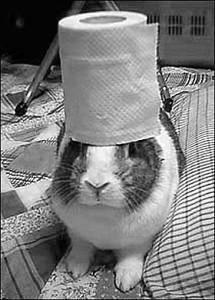

In [0]:
cv2_imshow(red)

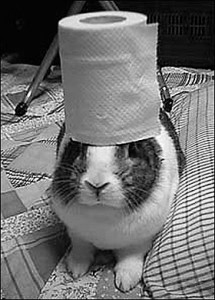

In [0]:
cv2_imshow(green)

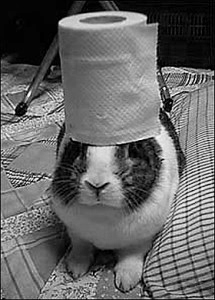

In [0]:
cv2_imshow(blue)

# Inital imports

In [0]:
pip install imageai

     |████████████████████████████████| 184kB 8.1MB/s 


In [0]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 31kB/s 
     |████████████████████████████████| 368kB 58.7MB/s 
     |████████████████████████████████| 3.2MB 51.6MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0


In [0]:
import imageai

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer # will tell you to upgrade to tf2.x, ignore as this won't work in 2.x

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [0]:
import os

In [0]:
os.path.abspath("drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper") # grab absolute paths just in case can't find by relative path (dataset)

'/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper'

In [0]:
os.path.abspath("drive/My Drive/Object Detection Final Project/obj detect 2/pretrained-yolov3.h5") # grab absolute paths just in case can't find by relative path (model)

'/content/drive/My Drive/Object Detection Final Project/obj detect 2/pretrained-yolov3.h5'

# Train model

In [0]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper")
trainer.setTrainConfig(object_names_array=["toiletpaper"], # array of classes
                      #  batch_size=30,
                       num_experiments=65, # epochs
                      train_from_pretrained_model= "/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-004--loss-0009.195.h5") # "/content/drive/My Drive/Final Project trying to improve model/obj detect 2/pretrained-yolov3.h5")

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.72
Anchor Boxes generated.
Detection configuration saved in  /content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/json/detection_config.json


In [0]:
trainer.trainModel()

Training on: 	['toiletpaper']
Training with Batch Size:  4
Number of Experiments:  65
Training with transfer learning from pretrained Model


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/65
560/560 [==============================] - 572s 1s/step - loss: 8.9137 - yolo_layer_4_loss: 1.3156 - yolo_layer_5_loss: 3.2040 - yolo_layer_6_loss: 4.3940 - val_loss: 15.6966 - val_yolo_layer_4_loss: 2.0268 - val_yolo_layer_5_loss: 4.1113 - val_yolo_layer_6_loss: 9.9485
Epoch 2/65
560/560 [==============================] - 491s 877ms/step - loss: 8.1270 - yolo_layer_4_loss: 1.2481 - yolo_layer_5_loss: 2.7736 - yolo_layer_6_loss: 4.1053 - val_loss: 19.6854 - val_yolo_layer_4_loss: 2.8751 - val_yolo_layer_5_loss: 3.4212 - val_yolo_layer_6_loss: 9.4361
Epoch 3/65
560/560 [==============================] - 481s 859ms/step - loss: 7.6965 - yolo_layer_4_loss: 1.2506 - yolo_layer_5_loss: 2.5114 - yolo_layer_6_loss: 3.9345 - val_loss: 15.1589 - val_yolo_layer_4_loss: 2.4376 - val_yolo_layer_5_loss: 4.2378 - val_yolo_layer_6_loss: 8.4824
Epoch 4/65
560/560 [==============================] - 480s 857ms/step - loss: 7.4855 - yolo_layer_4_loss: 1.1417 - yolo_layer_5_loss: 2.4493 - yolo_

KeyboardInterrupt: ignored

# Load model

In [0]:
from imageai.Detection.Custom import CustomObjectDetection

In [0]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-038--loss-0003.517.h5") # detection_model-ex-054--loss-0004.711.h5")
detector.setJsonPath("/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/json/detection_config.json")
detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp95.jpg", 
#                                              output_image_path="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp95tested.jpg",
#                                              minimum_percentage_probability=28)
# for detection in detections:
#     print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

# Grab outputs

In [0]:
track_info = []
for i in range(91,103):
  detections = detector.detectObjectsFromImage(input_image=f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp{i}.jpg", 
                                               output_image_path=f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp{i}tested1.jpg",
                                               minimum_percentage_probability=25)
  track_info.append(detections)
  for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
  print('\n new pic')
# output images will already be put into path  

toiletpaper  :  57.010072469711304  :  [36, 117, 114, 194]

 new pic
toiletpaper  :  46.24051749706268  :  [85, 64, 173, 155]

 new pic

 new pic
toiletpaper  :  48.699310421943665  :  [653, 222, 768, 344]
toiletpaper  :  31.409159302711487  :  [812, 349, 863, 498]

 new pic
toiletpaper  :  55.852121114730835  :  [206, 137, 234, 173]

 new pic
toiletpaper  :  61.26179099082947  :  [133, 84, 147, 105]
toiletpaper  :  73.45408797264099  :  [125, 95, 142, 119]
toiletpaper  :  73.95870089530945  :  [112, 112, 132, 134]
toiletpaper  :  68.85052919387817  :  [138, 113, 155, 139]
toiletpaper  :  74.53199028968811  :  [94, 136, 117, 161]
toiletpaper  :  66.63915514945984  :  [125, 137, 148, 162]
toiletpaper  :  51.791542768478394  :  [79, 160, 103, 166]
toiletpaper  :  69.14398670196533  :  [115, 157, 143, 166]

 new pic
toiletpaper  :  62.119024991989136  :  [60, 35, 165, 155]

 new pic

 new pic

 new pic
toiletpaper  :  64.63899612426758  :  [63, 66, 208, 177]

 new pic
toiletpaper  :  54.9

# Use output info

In [0]:
import cv2

In [0]:
j = 91
for i in track_info:
  current_img = cv2.imread(f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp{j}.jpg", cv2.IMREAD_UNCHANGED)
  for box in i:
    
    cv2.rectangle(img = current_img,
                  rec = (box['box_points'][0], box['box_points'][1], box['box_points'][2]-box['box_points'][0], box['box_points'][3]-box['box_points'][1]), # integer argument expected
                  color = (255,200,0),
                  thickness = 1)

    cv2.putText(img = current_img,
                text = f"{box['name']}", # gonna be only toiletpaper so...
                color = (0,0,0), 
                org = (box['box_points'][0] + 3, box['box_points'][1] + 11), 
                fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale = .3,
                thickness = 1)

    cv2.putText(img = current_img, 
                text = f"{round(box['percentage_probability'], 4):.2f}%", 
                color = (0,0,0), 
                org = (box['box_points'][0] + 2, box['box_points'][1] + 26), 
                fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale = .3,
                thickness = 1)
    
    cv2.imwrite(f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/validation/images/tp{j}tested1.jpg", current_img)
  j += 1

# Evaluate model

## Model with image augmentation

In [0]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper")
metrics = trainer.evaluateModel(model_path="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-038--loss-0003.517.h5", 
                                json_path="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/json/detection_config.json", 
                                iou_threshold=0.5, 
                                object_threshold=0.3, 
                                nms_threshold=0.5)
print(metrics)

Starting Model evaluation....


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  /content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-038--loss-0003.517.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
toiletpaper: 0.4435
mAP: 0.4435
[{'model_file': '/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-038--loss-0003.517.h5', 'using_iou': 0.5, 'using_object_threshold': 0.3, 'using_non_maximum_suppression': 0.5, 'average_precision': {'toiletpaper': 0.44348032242769087}, 'map': 0.44348032242769087}]


## Model without image augmentation

In [0]:
trainer.setDataDirectory(data_directory="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper")
metrics = trainer.evaluateModel(model_path="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-054--loss-0004.711.h5", 
                                json_path="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/json/detection_config.json", 
                                iou_threshold=0.5, 
                                object_threshold=0.3, 
                                nms_threshold=0.5)
print(metrics)

Starting Model evaluation....


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  /content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-054--loss-0004.711.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
toiletpaper: 0.3801
mAP: 0.3801
[{'model_file': '/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/models/detection_model-ex-054--loss-0004.711.h5', 'using_iou': 0.5, 'using_object_threshold': 0.3, 'using_non_maximum_suppression': 0.5, 'average_precision': {'toiletpaper': 0.380144850733086}, 'map': 0.380144850733086}]


# Image augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.07,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [0]:
start = list(range(1,91))
exclude = [1, 10, 26, 28, 64, 65, 66, 67, 68] # image numbers whose formats weren't compatible in labelimg for some reason

tprange = [i for i in start if not i in exclude]
tprange

In [0]:
for tp_num in tprange:
  img = load_img(f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/images/tp{tp_num}.jpg")  # this is a PIL image
  x = img_to_array(img)  # this is a numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a numpy array with shape (1, 3, 150, 150)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the specified directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir="/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/image aug", save_prefix='aug', save_format='jpeg'):
      i += 1
      if i > 2:
          break  # or else the generator would loop indefinitely

# Rename new images

## Grab current image names

In [0]:
from os import listdir
from os.path import isfile, join

In [0]:
onlyfiles = [f for f in listdir("/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/image aug/") if isfile(join("/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/image aug", f))]

## Rename to make file names consistent

In [0]:
from os import rename

In [0]:
i = 103
for f in onlyfiles:
  os.rename(src = f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/image aug/{f}",
            dst = f"/content/drive/My Drive/Final Project trying to improve model/obj detect 2/toiletpaper/train/image aug/tp{i}.jpg")
  i += 1

In [0]:
onlyfiles